in this notebook we:
* run first training rounds!

NOTE! This notebook was run on train_valid_df.csv data with no Blank class in it (an idea abandoned later)

In [1]:
from pathlib import Path
import json
import logging

import numpy as np
import pandas as pd

from fastai.vision import *

import os

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

PATH_TO_TRAIN_DF = Path("/home/jupyter/inspect_data_split_validation")
PATH_TO_IMG = Path("/data/Gabon_trainingData")
PATH_TO_MODELS = Path("/home/jupyter/training/saved_models")

from functions import *

In [2]:
df = pd.read_csv(PATH_TO_TRAIN_DF / "train_valid_df.csv")
df.head()

,uniqueName,species,main_folder,is_valid,sub_folder
0,0000005.jpg,Human,Compressed Camera Trap Images,False,T33
1,0000007.jpg,Human,Compressed Camera Trap Images,False,T33
2,0000009.jpg,Human,Compressed Camera Trap Images,False,T33
3,0000013.jpg,Human,Compressed Camera Trap Images,False,T33
4,0000015.jpg,Human,Compressed Camera Trap Images,False,T33


In [3]:
classes = df.species.unique()
print(len(classes)) # no Blank and no "Mammal_Other"
classes

28


array(['Human', 'Blank', 'Elephant_African', 'Hog_Red_River', 'Buffalo_African', 'Leopard_African', 'Monkey',
       'Duiker_Red', 'Civet_African_Palm', 'Squirrel', 'Duiker_Blue', 'Bird', 'Mongoose_Black_Footed', 'Rodent',
       'Duiker_Yellow_Backed', 'Genet', 'Chimpanzee', 'Gorilla', 'Mongoose', 'Porcupine_Brush_Tailed', 'Pangolin',
       'Mandrillus', 'Chevrotain_Water', 'Cat_Golden', 'Rat_Giant', 'Guineafowl_Crested', 'Guineafowl_Black',
       'Rail_Nkulengu'], dtype=object)

In [22]:
# def get_training_data(img_size, batch_size=128, partial_pct=1.0):
#     np.random.seed(273)
#     src = (ImageList.from_df(df, cols="uniqueName", path=PATH_TO_IMG)
#            .use_partial_data(partial_pct)
#            .split_from_df("is_valid")
#            .label_from_df(cols="species"))

#     tfms = get_transforms()  # TODO
#     data = (src.transform(tfms, size=img_size, padding_mode ="zeros")
#             .databunch(bs=batch_size).normalize(imagenet_stats))
#     return data

# def get_initial_learner(data):
# #     acc_02 = partial(accuracy_thresh, thresh=0.2)
#     learn = cnn_learner(data, models.resnet50, metrics=[accuracy])#, callback_fns=[partial(WandbCallback)])
#     learn.model_dir = PATH_TO_MODELS
#     return learn

# def save_model(learn, name):
#     """ This function saves the model in 'learn' to a file 'name',
#     however, it saves a version stripped of callbacks (e.g., wandb) as it spoil
#     inference when wandb is not available, preserving it in learn.
#     """
#     callbacks = learn.callback_fns  # preserve wandb callback and others
#     learn.callback_fns = []  # clean callbacks

#     learn.save(PATH_TO_MODELS / name)  # save only weights, adds .pth automatically
#     learn.export(PATH_TO_MODELS / f"{name}.pkl")  # serialize entire model, need to add .pkl
# #     wandb.save(str(PATH_TO_MODELS / f"{name}.pkl"))
#     learn.callback_fns = callbacks  # restore callbacks

# def load_weights(learn, name):
#     if (PATH_TO_MODELS / f"{name}.pth").is_file():
#         learn.load(PATH_TO_MODELS / name)
#         return True
#     else:
#         return False

# def run_training(learn, model_name, lr, n_epochs, lr_end=None):
#     if load_weights(learn, model_name):
#         logging.info(f"Loaded weights for {model_name}, skipping training")
#     else:
#         logging.info(f"running training {model_name}")

# #         wandb.config[f"{model_name}_lr"] = lr
# #         wandb.config[f"{model_name}_n_epochs"] = n_epochs

#         lr_slice = slice(lr)
#         if lr_end:
# #             wandb.config[f"{model_name}_lr_end"] = lr_end
#             lr_slice = slice(lr, lr_end)

#         learn.fit_one_cycle(n_epochs, lr_slice)
#         logging.info(f"finished training {model_name}")
#         save_model(learn, model_name)
#         logging.info(f"saved {model_name}")
        
# def run_find_lr(learn, model_name):
#     learn.lr_find()
#     fig = learn.recorder.plot(return_fig=True)
#     fig_name = f"lr_find_for_{model_name}"
# #     wandb.log({fig_name: fig})
#     fig.savefig(fig_name + ".png")

In [4]:
data = get_training_data(df, (384 // 4, 512 // 4), partial_pct=0.01)

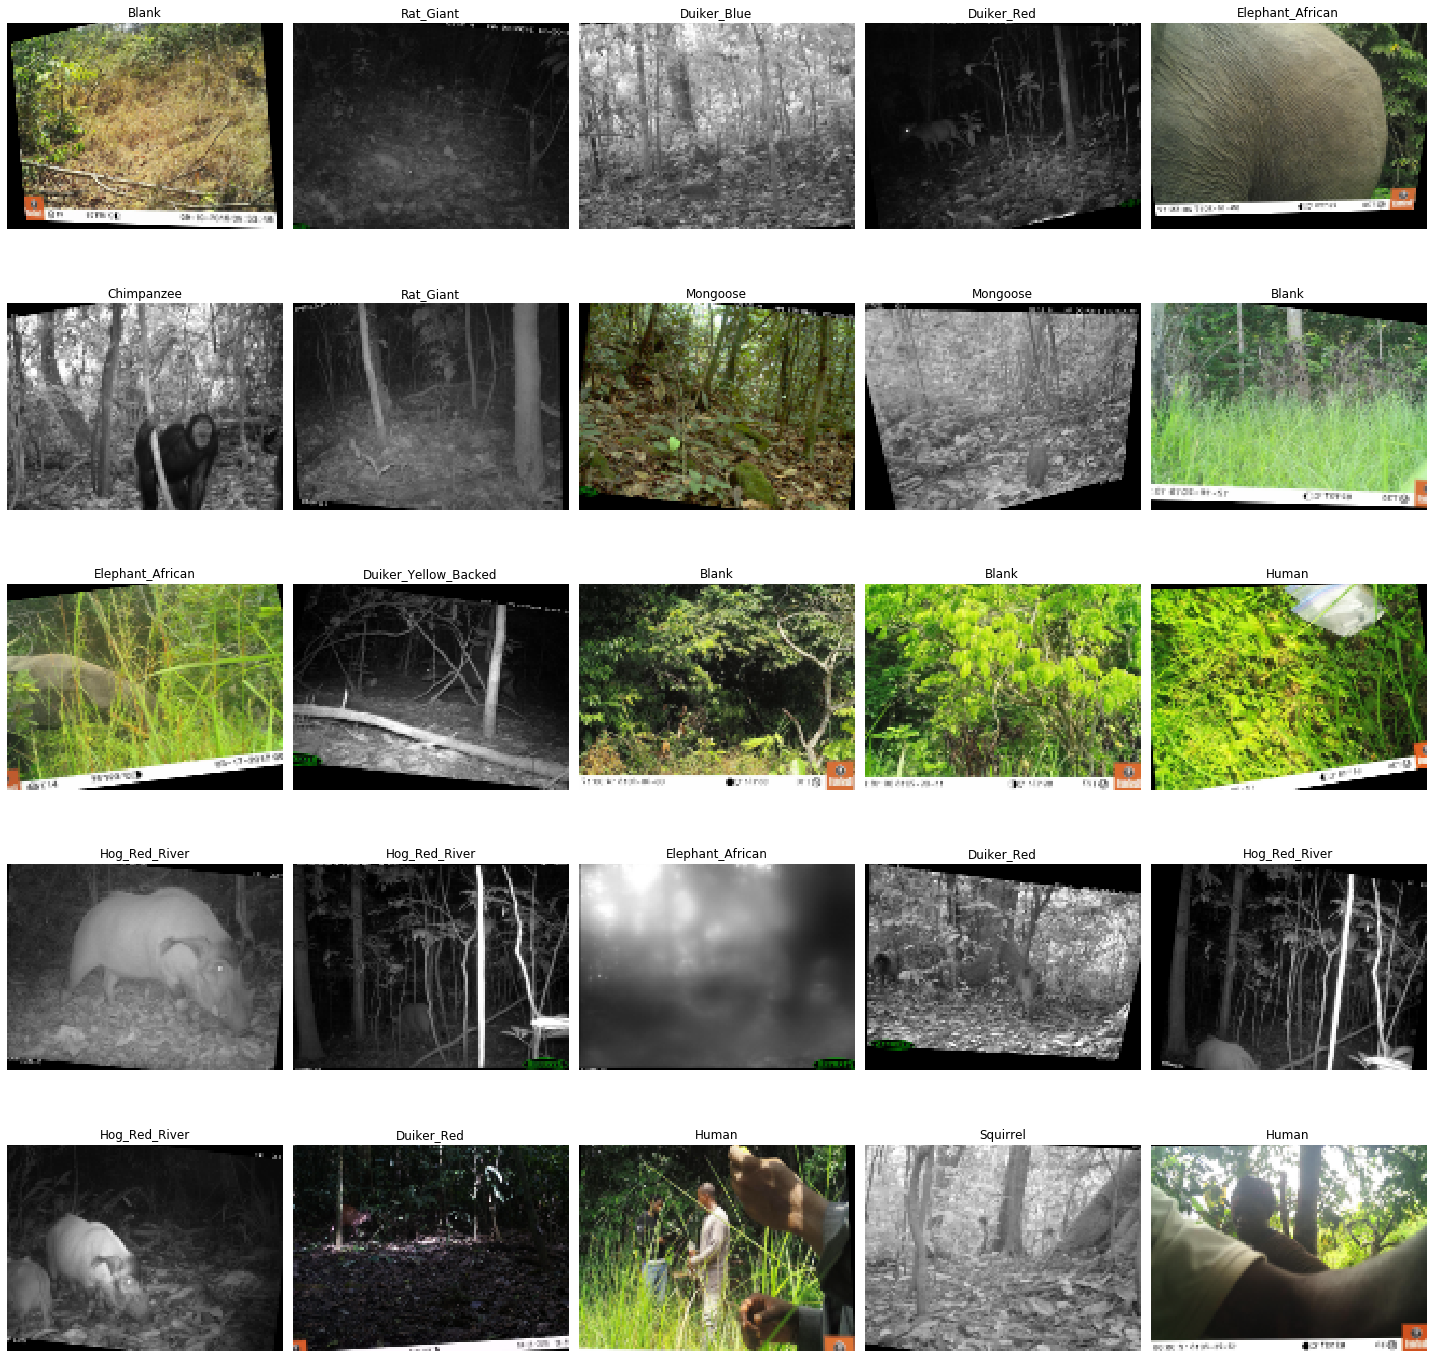

In [6]:
data.show_batch()

In [5]:
learn = get_initial_learner(data)

In [8]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
CPU times: user 7.8 s, sys: 1.96 s, total: 9.76 s
Wall time: 6min 47s


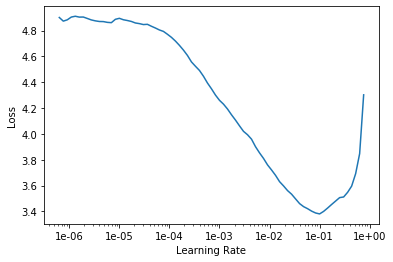

In [9]:
%%time
run_find_lr(learn, "stage1-1epochs-96_128_test_copy")

In [6]:
%%time
initial_lr = 0.01
run_training(learn, "stage1-1epochs-96_128_test_copy", lr=initial_lr, n_epochs=2)

epoch,train_loss,valid_loss,accuracy,time
0,2.891008,3.544058,0.323671,02:18
1,2.293908,2.610845,0.364734,02:05


CPU times: user 4.54 s, sys: 1.94 s, total: 6.47 s
Wall time: 4min 24s


In [7]:
interp = ClassificationInterpretation.from_learner(learn)

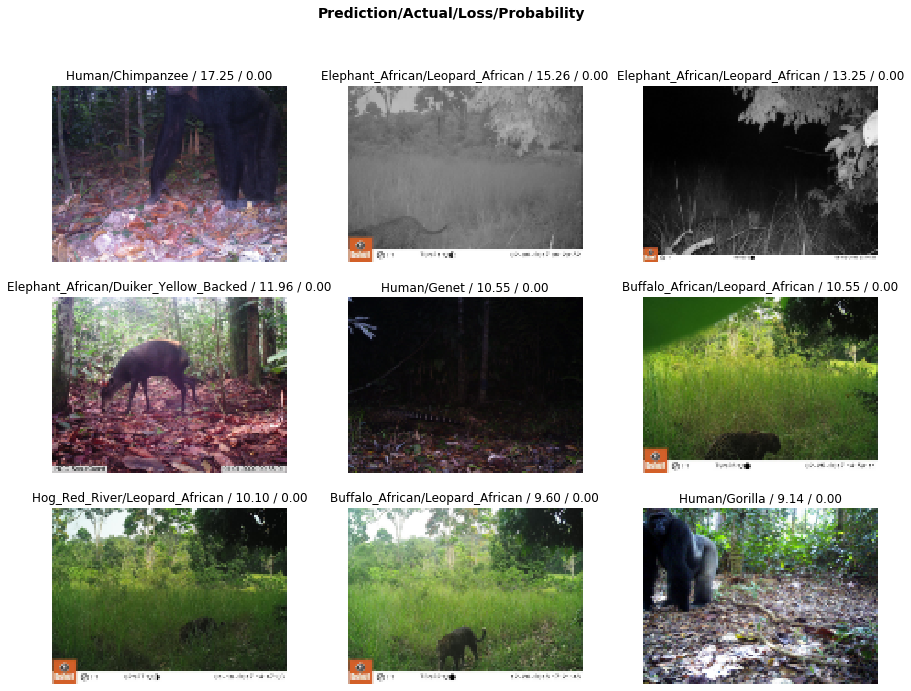

In [30]:
interp.plot_top_losses(9, figsize=(15,11))

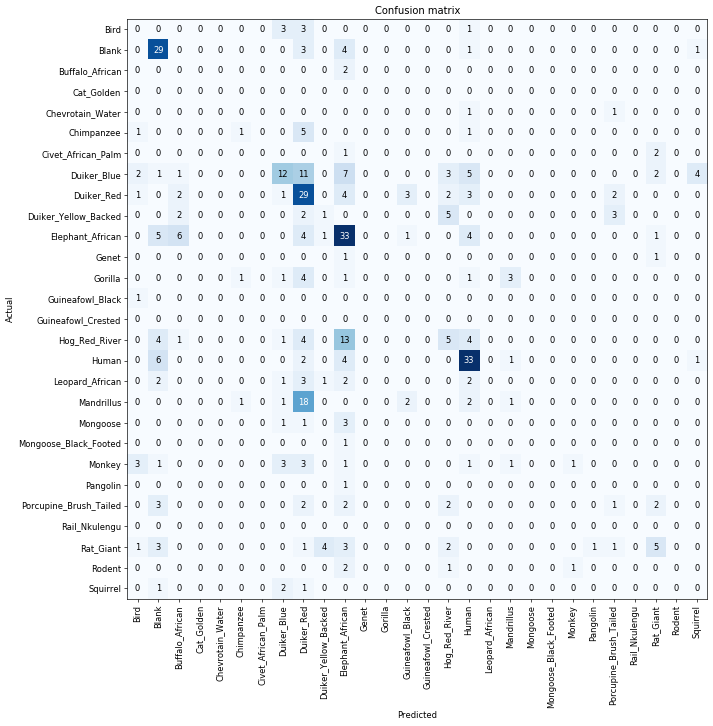

In [8]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)